<a href="https://colab.research.google.com/github/dXdR-AI/Stargazer-Space-Apps-2022/blob/master/NASA_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Space Apps Challenge 2022

### Install Package (*)

In [ ]:
!pip install texthero
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 42.4 MB/s 
     |████████████████████████████████| 10.4 MB 32.8 MB/s 
     |████████████████████████████████| 184 kB 48.0 MB/s 
     |████████████████████████████████| 1.0 MB 22.8 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.0
    Uninstalling thinc-8.1.0:
      Successfully uninstalled thinc-8.1.0
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.1
    Uninstalling spacy-3.4.1:
      Successfully uninstalled spacy-3.4.1
ERROR: pip's dependency resolver does not currently take int

### Get the "NASA_ID", "Title", "Description" from NASA API  (*)

In [ ]:
import json
import requests
import numpy as np
import random
from matplotlib import pyplot as plt
import csv
import pandas as pd
import texthero as hero

def get_data(api):
  response = requests.get(f"{api}", headers={"X-RapidAPI-Key": "caA3d7kx6x5J4ssCP3l0L1fyBjxwZNWqbtlJGLUv"})
  if response.status_code == 200:
    # print("sucessfully fetched the data")
    return response.json()
  else:
    print(f"There's a {response.status_code} error with your request")

In [ ]:
data = get_data('https://images-api.nasa.gov/search?q=nebula&media_type=image') # Search input: nebula
items = data['collection']['items']
total_hits = data['collection']['metadata']['total_hits']   # Total number of search results
total_pages = total_hits // 100 + 1  # Total pages
#print(json.dumps(data['collection']['items'],indent=4))

with open('nasa_data.csv', 'w', newline='', encoding="utf-8") as f:
  writer = csv.writer(f)
  writer.writerow(["id", "title", "keywords", "desc", "desc_clean"])
  for i in range(1, total_pages + 1):
    data = get_data('https://images-api.nasa.gov/search?q=nebula&media_type=image&page={}'.format(i)) # Search input: nebula
    items = data['collection']['items']
    for item in items:
      id = item['data'][0]['nasa_id']
      title = item['data'][0]['title']
      try:
        keywords = item['data'][0]['keywords']
      except:
        keywords = []
      desc = item['data'][0]['description']
      writer.writerow([id, title, keywords, desc])


### Text Clustering (*)
#### Silhouette Method

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette = []
max_k = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, max_k+1):
  k_means = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

NameError: ignored

#### Elbow Method

In [ ]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

## **Data Preprocessing**
Clean the data by texthero and self-defined rule


In [ ]:
!pip install boilerpy3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bs4 import BeautifulSoup


# Read data
df = pd.read_csv("nasa_data.csv")
# Data Cleaning

sep = 'read more'
df['desc_clean'] = df['desc_clean'].split(sep, 1)[0]
# for index, row in df.iterrows():
#   try:
#     # df['desc＿clean'] = BeautifulSoup(df['desc＿clean'] , "html.parser")
#     # for elm in df['desc＿clean'].find_all():
#     #   elm.decompose()
#     #  Data Cleaning by self-defined rules
    
#   except:
#     pass

#df['desc＿clean'] = df['desc'].pipe(hero.clean)



df.to_csv('nasa_data_clean.csv')


AttributeError: ignored

## **Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# Feature Extraction
documents = df['desc＿clean'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 20 # test out different values
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df['cluster'] = model.labels_

print(df.head())

# output the result to a text file.

clusters = df.groupby('cluster')    

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['title','desc','keywords']] # get title and desc columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

                              id                               title  \
0                       PIA14417  Weighing in on the Dumbbell Nebula   
1  GSFC_20171208_Archive_e001465                    Planetary Nebula   
2                       PIA04216                          Ant Nebula   
3                       PIA04200                      Doradus Nebula   
4                       PIA04225                         N44C nebula   

                                            keywords  \
0        ['Helix Nebula', 'Spitzer Space Telescope']   
1  ['Planetary Nebula', 'nasa', 'nebula', 'hubble...   
2           ['Ant nebula', 'Hubble Space Telescope']   
3                                         ['nebula']   
4          ['N44C nebula', 'Hubble Space Telescope']   

                                                desc  \
0  The Dumbbell nebula, also known as Messier 27,...   
1  This planetary nebula's simple, graceful appea...   
2  This image from NASA Hubble Space Telescope im...   
3  A p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## **TODO: Link Generation**

[link text](https://)年份分布分析 Year Distribution Analysis

1.   List item
2.   List item



In [ ]:
display(df)

,id,title,desc,pca
0,PIA14417,Weighing in on the Dumbbell Nebula,"The Dumbbell nebula, also known as Messier 27,...","[-0.13969242075674712, -0.02464478571986029]"
1,GSFC_20171208_Archive_e001465,Planetary Nebula,"This planetary nebula's simple, graceful appea...","[0.4858016244422807, -0.007253800517095383]"
2,PIA04216,Ant Nebula,This image from NASA Hubble Space Telescope im...,"[-0.105280536838858, 0.02320076695101562]"
3,PIA04200,Doradus Nebula,"A panoramic view of a vast, sculpted area of g...","[-0.10891346442875909, -0.09911435349099451]"
4,PIA04225,N44C nebula,Resembling the hair in Botticelli famous portr...,"[-0.12459266620557115, 0.029732489989536943]"
...,...,...,...,...
305,GSFC_20171208_Archive_e000334,Hubble Takes Mars Portrait Near Close Approach,Mars is looking mighty fine in this portrait n...,"[0.41058211072442463, 0.027678707043947797]"
306,GSFC_20171208_Archive_e000433,Hubble Spies a Rebel,Most galaxies possess a majestic spiral or ell...,"[0.4698350851223856, 0.03169831841326421]"
307,GSFC_20171208_Archive_e002063,Hubble Snaps Sharp Image Of Cosmic Concoction,"NASA image release July 13, 2010 To view a vi...","[0.06457743371218232, -0.053092454321648046]"
308,GSFC_20171208_Archive_e000725,A Hubble Study of the Peculiar Asymmetry of NG...,This image provides the clearest ever view of ...,"[0.37903535841670183, -0.08259672187786767]"


In [ ]:
# Year
total_hits = []
for year in range(2022,2023):
  data = get_data('https://images-api.nasa.gov/search?year_start={}&year_end={}'.format(year,year))
  total_hits.append(data['collection']['metadata']['total_hits'])
  # print("Year:",year," , total hits:",total_hits)
print(total_hits)


plt.hist(total_hits,density=1, bins=20) 
plt.axis([1900, 2023, 0, max(total_hits)]) 
plt.title('Year Distribution of NASA data')
plt.xlabel('Years')
plt.ylabel('NASA media count')
plt.show()

NameError: ignored

Keyword Analysis

In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

Download media to google folder

In [ ]:
import os
import urllib.request
from tqdm import tqdm

for url in tqdm(mediaUrl):
  try:
    !wget -q "$url" -P "/tmp" # type: ignore
    #urllib.request.urlretrieve(url)
  except Exception as e:
    print(e)
    pass

NameError: ignored

# ML search using BERT

This is a TSV (tab-separated value) full of metadata for the Astronomy Picture of the Day archive:

In [ ]:
!gdown 1-S10FDQPAs3d8g13h0XxGkbDYUkpvA3S

Downloading...
From: https://drive.google.com/uc?id=1-S10FDQPAs3d8g13h0XxGkbDYUkpvA3S
To: /content/apod_metadata.tsv
100% 7.17M/7.17M [00:00<00:00, 73.2MB/s]


In [ ]:
!cat /content/apod_metadata.tsv

id	title	description	thumbnail_url	full_resolution_url
0	APOD: 2013 July 9 - Supergiant Star Gamma Cygni	Supergiant star Gamma Cygni lies at the center of the Northern Cross, a famous asterism in the constellation of the Swan (Cygnus). Known by the proper name Sadr, the bright star also lies at the center of this gorgeous skyscape, featuring a complex of stars, dust clouds, and glowing nebulae along the plane of our Milky Way galaxy. The field of view spans over 3 degrees (six Full Moons) on the sky and includes emission nebula IC 1318 and open star cluster NGC 6910. Left of Gamma Cygni and shaped like two glowing cosmic wings divided by a long dark dust lane, IC 1318's popular name is understandably the Butterfly Nebula. Above and slightly left of Gamma Cygni, are the young, still tightly grouped stars of NGC 6910. Some distance estimates for Gamma Cygni place it at around 1800 light-years while estimates for IC 1318 and NGC 6910 range from 2,000 to 5,000 light-years.	image/1307/gamma

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Note: relative URLs are relative to https://apod.nasa.gov/apod/

In [ ]:
apod_metadata_file = open('/content/apod_metadata.tsv')
lines = apod_metadata_file.readlines()

metadata = []
for line in lines:
  metadata.append(line.split('\t'))

# remove column headers
metadata.pop(0)

['id', 'title', 'description', 'thumbnail_url', 'full_resolution_url\n']

In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 4.9 MB 35.3 MB/s 
     |████████████████████████████████| 1.3 MB 49.6 MB/s 
     |████████████████████████████████| 163 kB 64.1 MB/s 
     |████████████████████████████████| 6.6 MB 55.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=412cd58fa888c3bb50f220154a163c5267c75d3ceb60796d7cc8e055c7a6623d
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
apod_descriptions = []
for line in metadata:
  apod_descriptions.append(line[2])

In [ ]:
print(apod_descriptions[:100])

["Supergiant star Gamma Cygni lies at the center of the Northern Cross, a famous asterism in the constellation of the Swan (Cygnus). Known by the proper name Sadr, the bright star also lies at the center of this gorgeous skyscape, featuring a complex of stars, dust clouds, and glowing nebulae along the plane of our Milky Way galaxy. The field of view spans over 3 degrees (six Full Moons) on the sky and includes emission nebula IC 1318 and open star cluster NGC 6910. Left of Gamma Cygni and shaped like two glowing cosmic wings divided by a long dark dust lane, IC 1318's popular name is understandably the Butterfly Nebula. Above and slightly left of Gamma Cygni, are the young, still tightly grouped stars of NGC 6910. Some distance estimates for Gamma Cygni place it at around 1800 light-years while estimates for IC 1318 and NGC 6910 range from 2,000 to 5,000 light-years.", '"In the center of M51, a spiral galaxy 23 million light-years away, astronomers have identified a dense region of yo

Uncomment and run the below code to recompute the embeddings for the APOD descriptions (slow, takes about two hours):

In [ ]:
from sentence_transformers import SentenceTransformer
# selected based on https://www.sbert.net/docs/pretrained_models.html
# sentence-transformers/all-mpnet-base-v2 took about two hours, but then I
# forgot to call close() on the pickle file and it wouldn't load, so I had to
# rerun with a faster one. This takes about 15 minutes.
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1') 
embeddings = model.encode(apod_descriptions)
print(embeddings)

[[-0.03061008 -0.003862   -0.04719517 ... -0.04759684 -0.11348783
   0.02013679]
 [-0.01274428  0.01364193 -0.01335934 ... -0.01911943 -0.02574803
  -0.01554178]
 [ 0.0194507   0.02625151 -0.02904182 ...  0.0454982  -0.03972432
  -0.07627533]
 ...
 [-0.04743592  0.01726656 -0.08974532 ... -0.04832433 -0.0134289
   0.01696476]
 [-0.00366112  0.08128405  0.07532336 ... -0.05398134 -0.06696641
  -0.02683018]
 [-0.00580101 -0.01767153 -0.00359993 ... -0.00759518 -0.04006996
  -0.0370993 ]]


In [ ]:
import pickle
out_file = open('apod_description_embeddings.obj', 'wb') 
pickle.dump(embeddings, out_file)
out_file.close()

This redownloads the saved embeddings from rlanday’s Google Drive:

In [ ]:
!gdown 1-TAPvfLdrd1SMUw3qL9Ml-sZaCQaWt7A

Downloading...
From: https://drive.google.com/uc?id=1-TAPvfLdrd1SMUw3qL9Ml-sZaCQaWt7A
To: /content/apod_description_embeddings.obj
100% 11.3M/11.3M [00:00<00:00, 26.1MB/s]


In [ ]:
import pickle
pickle_file = open('/content/apod_description_embeddings.obj', 'rb')
saved_embeddings = pickle.load(pickle_file)

In [ ]:
print(saved_embeddings.shape)

(7373, 384)


In [ ]:
import numpy as np
def DoSearch(query, top_n):
  query_embedding = model.encode(query)
  result_scores = np.matmul(saved_embeddings, query_embedding)
  apod_metadata_with_scores = []
  for i in range(len(result_scores)):
    apod_metadata_with_scores.append([result_scores[i]] + metadata[i])

  indices = np.flip(np.argsort(result_scores)[-top_n:])
  apod_metadata_with_scores = np.array(apod_metadata_with_scores)
  return apod_metadata_with_scores[indices]

In [ ]:
results = DoSearch('a surface humans have walked on', 10)
print(results)

[['0.5140987' '4289' 'APOD: May 3, 1998 - Standing on the Moon'
  '"Humans once walked on the Moon. Pictured above is the second person to stand on the lunar surface: Edwin ""Buzz"" Aldrin. During this Apollo 11 mission, Neil Armstrong (the first person to walk on the moon) and Buzz Aldrin landed on the Moon while Michael Collins circled in the Command Module above. The lunar team erected a plaque on the surface that reads: HERE MEN FROM THE PLANET EARTH FIRST SET FOOT UPON THE MOON JULY 1969 A.D. WE CAME IN PEACE FOR ALL MANKIND. The Apollo missions demonstrated that it is possible to land humans on the Moon and return them safely."'
  'image/9805/aldrin_a11.jpg' 'image/9805/aldrin_a11_big.gif\n']
 ['0.5140987' '4970' 'APOD: February 2, 1997 - Standing on the Moon'
  '"Humans once walked on the Moon. Pictured above is the second person to stand on the lunar surface: Edwin ""Buzz"" Aldrin. During this Apollo 11 mission, Neil Armstrong (the first person to walk on the moon) and Buzz Ald

In [ ]:
results = DoSearch('cool looking planets', 10)
print(results)

[['0.6426239' '1556' 'APOD: 2016 June 2 - Three Planets from Pic du Midi'
  "Seen any planets lately? All three planets now shining brightly in the night sky are imaged in these panels, captured last week with the 1 meter telescope at Pic du Midi Observatory in the French Pyrenees. Near opposition and closest to Earth on May 30, Mars is presently offering the best ground-based photo-ops in the last decade. The sharp image finds clouds above the Red Planet's north pole (top) and towering volcanos near its right limb. Saturn reaches its own opposition tonight, its bright rings and gaps clearly revealed in the telescopic portrait. Jupiter is currently highest during the evening twilight and shows off its planet-girdling cloud bands and Great Red Spot in this scene. Of course close-up images of the ruling gas giant will follow the July arrival of the solar-powered Juno spacecraft and JunoCam."
  'image/1606/ia90sewnDauvergne600h.jpg'
  'image/1606/ia90sewnDauvergne.jpg\n']
 ['0.6220397' '2

In [ ]:
print(DoSearch('astronauts', 10))

[7184 5641 1692  657  829 2790  435 5714 6406 2194]
[['0.59857166' '7184' 'APOD: June 15, 1996 - Walking in Space'
  '"Pictured above is the first american astronaut to walk in space: Edward White. White is seen floating outside the Gemini 4 capsule in 1965. The term ""spacewalk"" is deceiving since astronauts do not actually walk - they float - usually without their feet touching anything solid. White was connected to the spaceship only by a thick tether. He carried a Hand-Held Self-Maneuvering Unit which expelled gas allowing him to move around. A maneuvering device is necessary in the free-fall of space since there is nothing (besides the spacecraft) to push off of to guide movements."'
  'image/wic_select.gif'
  'http://images.jsc.nasa.gov/images/pao/GT4/10073956.jpg\n']
 ['0.59012365' '5641' 'APOD: August 1, 1999 - Walking in Space'
  'Pictured above is the first american astronaut to walk in space: Edward White. White is seen floating outside the Gemini 4 capsule in 1965. The ter

In [ ]:
print(DoSearch('pluto', 10))

[5639 2476 6403 2525   25 7247 1057 4054 6629 4113]
[['0.7300882' '5639' 'APOD: December 28, 1997 - Pluto: The Frozen Planet'
  "The Hubble Space Telescope imaged Pluto and its moon Charon in 1994. Pluto is usually the most distant planet from the Sun but because of its elliptic orbit Pluto crossed inside of Neptune's orbit in 1979 and will cross back out again in 1999. Compared to the other planets, very little is known about Pluto. Pluto is smaller than any other planet and even smaller than several other planet's moons. From Pluto, the Sun is just a tiny point of light. Pluto is probably composed of frozen rock and ice, much like Neptune's moon Triton. Pluto has not yet been visited by a spacecraft, but a mission is being planned for the next decade."
  'image/pluto_hst.gif' 'image/pluto_hst.gif\n']
 ['0.7300882' '2476' 'APOD: August 18, 1995 - Pluto: The Frozen Planet'
  "The Hubble Space Telescope imaged Pluto and its moon Charon in 1994. Pluto is usually the most distant planet f

In [ ]:
DoSearch('nebula', 10)

array([['0.749607', '1324',
        'APOD: 2011 February 18 - Planetary Nebula Project',
        "Cast off by dying sunlike stars, planetary nebulae are a brief but glorious final phase of stellar evolution. The gaseous shrouds are ionized by an extremely hot central source, the shrinking core of a star running out of fuel for nuclear fusion. Shining in the cosmic night, their simple symmetries are fascinating and have inspired this planetary nebula poster project. In it, nine planetaries are displayed for comparison in a 3x3 grid. Of course, planetary nebula fans should be able to pick out the bright Messier objects M27 - the Dumbbell Nebula, M76 - the Little Dumbbell, and M57 - the Ring Nebula, as well as NGC 6543, aka the Cat's Eye Nebula. Lesser known nebulae include the Medusa and the Bug. All the images were made with detailed narrow band data and are shown at the same angular scale, spanning 20 arc minutes (1/3 degree). At that scale, the grey circle represents the apparent size

In [ ]:
import cv2
import imageio
from google.colab.patches import cv2_imshow
import urllib.request as urllib

def ShowImage(url):
  if '.gif' in url:
    resp = urllib.urlopen(url)
    imbytes = bytearray(resp.read())
    gif_file = open('tmp.gif', "wb+").write(imbytes)

    gif = imageio.mimread('tmp.gif')
    imgs = [cv2.cvtColor(img, cv2.COLOR_RGB2BGR) for img in gif]
    image = imgs[0]
  else:
    resp = urllib.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  # from https://stackoverflow.com/questions/64609524/resize-an-image-with-a-max-width-and-height-using-opencv
  maxwidth, maxheight = 200, 50000

  f1 = maxwidth / image.shape[1]
  f2 = maxheight / image.shape[0]
  f = min(f1, f2)  # resizing factor
  dim = (int(image.shape[1] * f), int(image.shape[0] * f))
  resized = cv2.resize(image, dim)
  cv2_imshow(resized)

def ShowResults(query, top_n):
  results = DoSearch('nebula', 10)
  for result in results:
    print("Score: " + result[0])
    print(result[2])
    print(result[3])

    thumbnail_url = 'https://apod.nasa.gov/apod/' + str(result[4]).strip()
    ShowImage(thumbnail_url)

Score: 0.749607
APOD: 2011 February 18 - Planetary Nebula Project
Cast off by dying sunlike stars, planetary nebulae are a brief but glorious final phase of stellar evolution. The gaseous shrouds are ionized by an extremely hot central source, the shrinking core of a star running out of fuel for nuclear fusion. Shining in the cosmic night, their simple symmetries are fascinating and have inspired this planetary nebula poster project. In it, nine planetaries are displayed for comparison in a 3x3 grid. Of course, planetary nebula fans should be able to pick out the bright Messier objects M27 - the Dumbbell Nebula, M76 - the Little Dumbbell, and M57 - the Ring Nebula, as well as NGC 6543, aka the Cat's Eye Nebula. Lesser known nebulae include the Medusa and the Bug. All the images were made with detailed narrow band data and are shown at the same angular scale, spanning 20 arc minutes (1/3 degree). At that scale, the grey circle represents the apparent size of the Full Moon. These planeta

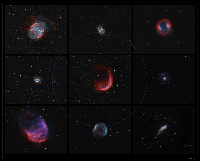

Score: 0.72705793
APOD: December 31, 1997 - NGC 5307: A Symmetric Planetary Nebula
Some stellar nebulae are strangely symmetric. For example, every major blob of gas visible on the upper left of NGC 5307 appears to have a counterpart on the lower right. This picture taken by the Hubble Space Telescope was released last week. NGC 5307 is an example of a planetary nebula with a spiral shape. Spiral planetary nebulae are thought to be caused by a bright central white dwarf star expelling a symmetric wobbling jet of rapidly moving gas. It takes light about 10,000 years to reach us from NGC 5307, and about 6 months just to go from one side to the other. In contrast, light takes only about 8 minutes to reach Earth from the Sun.


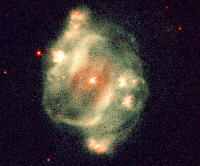

Score: 0.71962976
APOD: August 20, 1996 - A Close-Up of the Lagoon Nebula
Ribbons of red-glowing gas and dark dust surround massive young stars in this close-up of the Lagoon Nebula taken by the Hubble Space Telescope. The Lagoon Nebula is relatively close and bright - it appears larger than the Full Moon and is visible even without a telescope. Light takes about 5000 years to reach here from there. The Lagoon Nebula houses the open star cluster M8. This photograph is combination of exposures taken in the red, green and ultraviolet. The unusual bright central part of the Lagoon Nebula (lower left in this image) is known as the Hourglass Nebula.


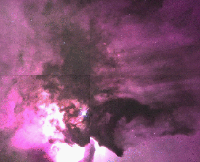

Score: 0.7192342
APOD: 2003 August 20 - The E Nebula in Aquila
Several unusual strands of darkness are prominent toward the constellation of Aquila. This particular dark nebula is known as the E Nebula, for its evocative shape, or B142 and B143, for its position(s) on a list of such nebula compiled by Barnard. The E Nebula spans roughly the angle of a full Moon and lies about 2000 light years distant. The nebula can be seen with binoculars and is particularly visible during the summer months in Earth's northern hemisphere. Other names for dark nebula include absorption nebula, as they efficiently absorb visible light emitted behind them, and molecular clouds, as they frequently attain temperatures low enough so that several different types of stable molecules can exist. The low temperatures of these interstellar clouds facilitate the formation of dense knots of gas that may then collapse into bright stars.


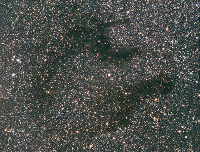

Score: 0.71607184
APOD: 2003 September 1 - A Beautiful Trifid
The beautiful Trifid Nebula (aka M20), a photogenic study in cosmic contrasts, lies about 5,000 light-years away toward the nebula rich constellation Sagittarius. A star forming region in the plane of our galaxy, the Trifid alone illustrates three basic types of astronomical nebulae; red emission nebulae dominated by light from hydrogen atoms, blue reflection nebulae produced by dust reflecting starlight, and dark absorption nebulae where dense dust clouds appear in silhouette. The bright emission nebula on the right, separated into three parts by obscuring dust lanes, lends the nebula its popular name. Many details are apparent in this gorgeous high-resolution image of the Trifid. For example, light-year long pillars and jets sculpted by newborn stars - visible here in the upper right-hand corner of the emission nebula - appear in Hubble Space Telescope close-up images of the region.


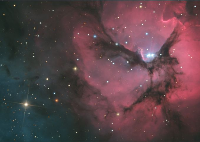

Score: 0.7044568
APOD: 2021 January 18 - The Medulla Nebula Supernova Remnant
What powers this unusual nebula? CTB-1 is the expanding gas shell that was left when a massive star toward the constellation of Cassiopeia exploded about 10,000 years ago. The star likely detonated when it ran out of elements, near its core, that could create stabilizing pressure with nuclear fusion. The resulting supernova remnant, nicknamed the Medulla Nebula for its brain-like shape, still glows in visible light by the heat generated by its collision with confining interstellar gas. Why the nebula also glows in X-ray light, though, remains a mystery. One hypothesis holds that an energetic pulsar was co-created that powers the nebula with a fast outwardly moving wind. Following this lead, a pulsar has recently been found in radio waves that appears to have been expelled by the supernova explosion at over 1000 kilometers per second. Although the Medulla Nebula appears as large as a full moon, it is so faint 

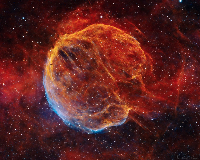

Score: 0.70155054
APOD: 2007 August 4 - Sagittarius Triplet
These three bright nebulae are often featured in telescopic tours of the constellation Sagittarius and the crowded starfields of the central Milky Way. In fact, 18th century cosmic tourist Charles Messier cataloged two of them; M8, the nebula below and right of center, and colorful M20 at the upper right. The third, NGC 6559, is left of M8, separated from the the larger nebula by a dark dust lane. All three are stellar nurseries about five thousand light-years or so distant. The expansive M8, over a hundred light-years across, is also known as the Lagoon Nebula while M20's popular moniker is the Trifid. This stunning digital view is actually a collaborative composite recorded by 2 cameras and 2 telescopes about 2 thousand miles apart. The deep, wide image field was captured under dark Arizona skies. Both M8 and M20 were recorded in more detail from an observatory in Pennsylvania. Glowing hydrogen gas creates the dominant red c

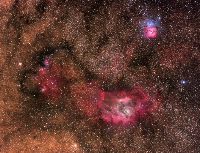

Score: 0.69936156
APOD: November 22, 1996 - Fliers Around the Blue Snowball Nebula
Planetary nebulae are strange. First, they are gas clouds and have nothing to do with our Solar System's planets. Next, although hundreds of planetary nebulae have been catalogued and thousands surely exist in our Galaxy, aspects of the formation process are still debated. But now yet another mystery has come to light: what created the fast-moving gas clouds that appear around planetary nebula? Dubbed FLIERs for Fast Low-Ionization Emission Regions, these knots of dense gas appear to have been ejected from the central star before it cast of the planetary nebula. Currently, no model can account for either their formation or longevity. In the above false-color picture of NGC 7662, the Blue Snowball Planetary Nebula, the FLIERs are featured in the image inserts.


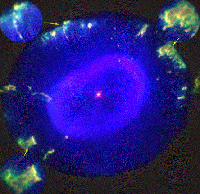

Score: 0.69911444
APOD: 2010 October 2 - Hubble s Lagoon
Like brush strokes on a canvas, ridges of color seem to flow across this scene. But here, the canvas is nearly 3 light-years wide and the colors map emission from ionized gas in the Lagoon Nebula, recorded by the Hubble Space Telescope's Advanced Camera for Surveys. Also known as M8, the nebula is a star forming region about 5,000 light-years distant in the constellation Sagittarius. Hubble's remarkably sharp, close-up view reveals undulating shapes sculpted by the energetic light and winds from the region's new born stars. Of course, the Lagoon nebula is a popular target for earthbound skygazers, too. It features a prominent dust lane and bright hourglass shape in small telescopes with wider fields of view.


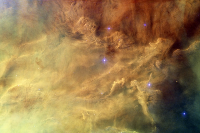

Score: 0.6983303
APOD: 2009 October 6 - The Lagoon Nebula from GigaGalaxy Zoom
"The large majestic Lagoon Nebula is home for many young stars and hot gas. Spanning 100 light years across while lying only about 5000 light years distant, the Lagoon Nebulae is so big and bright that it can be seen without a telescope toward the constellation of Sagittarius. Many bright stars are visible from NGC 6530, an open cluster that formed in the nebula only several million years ago. The greater nebula, also known as M8 and NGC 6523, is named ""Lagoon"" for the band of dust seen to the left of the open cluster's center. A bright knot of gas and dust in the nebula's center is known as the Hourglass Nebula. The above picture is a newly released, digitally stitched panorama of M8 taken as part of the GigaGalaxy Zoom project by the Wide Field Imager attached to the MPG/ESO 2.2-meter Telescope at the La Silla Observatory in Chile. The vista spans three times the diameter of the Moon, while the highest r

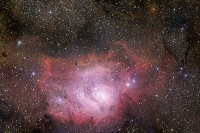

In [ ]:
ShowResults('nebula', 11) # get one extra so I can remove a duplicate